# Personal introduction
by Dan Velev (d.velev@student.fontys.nl)

## Summary
The notebook gives a summary of the Week 2 Assignment 4 of Data Visualization, which is about creating a heat map based on votes for a particular professional task project.

## Introduction
Following the tutorial steps in ADS-DV Week 2 Assignment 4, I will develop a rank matching according to the group preferences. In this assignment I will practice some math and sorting functions. The result will be presented as a heatmap.

## Voting data
First we will define the list of companies and professional task groups

In [2]:
companies = ('8Vance', 'Philips HC', 'PSV', 'Coosto', 'Orikami','Score','Heemskerk','Mirabeau')
groups = ('TheTree','Team+','A-Team','Tim','Arwin','Wesley','Tom','Sander')

Then we collect all group preferences for the companies.

In [3]:
votes = [
    (6,3,7,1,4,8,5,2),
    (6,7,3,2,4,8,1,5),
    (3,1,6,2,5,8,4,7),
    (5,1,2,4,6,8,3,7),
    (2,6,6,1,6,6,3,4),
    (6,4,3,1,4,8,2,7),
    (3,4,6,1,7,5,2,8),
    (5,3,7,2,8,6,1,4)
]

We will need to put all the data into Pandas dataframe for easier manipulation.

In [4]:
import pandas as pd

df = pd.DataFrame(votes, columns=companies, index=groups)
df.head(8)

,8Vance,Philips HC,PSV,Coosto,Orikami,Score,Heemskerk,Mirabeau
TheTree,6,3,7,1,4,8,5,2
Team+,6,7,3,2,4,8,1,5
A-Team,3,1,6,2,5,8,4,7
Tim,5,1,2,4,6,8,3,7
Arwin,2,6,6,1,6,6,3,4
Wesley,6,4,3,1,4,8,2,7
Tom,3,4,6,1,7,5,2,8
Sander,5,3,7,2,8,6,1,4


## Ranking all possible matches
We will use a ranked voting system. For every possible matching we compute the impopularity bu summing the ranking. But first, we will need to test 8! combinations, in order to see if it is feasible. 

In [5]:
import math, itertools
combinations = math.factorial(8)
print(combinations)
permutations = list(itertools.permutations(range(8)))

40320


Now we compute the impopularity score for each match by looping over all permutations, and store the score with each permutation.

In [6]:
scores = []
for permutation in permutations:
    sum = 0
    for group in range(8):
        sum += df.iloc[group, permutation[group]]
    scores.append((permutation, sum))
    
print('\n'.join(map(str,scores[0:10])))

((0, 1, 2, 3, 4, 5, 6, 7), 43)
((0, 1, 2, 3, 4, 5, 7, 6), 46)
((0, 1, 2, 3, 4, 6, 5, 7), 40)
((0, 1, 2, 3, 4, 6, 7, 5), 45)
((0, 1, 2, 3, 4, 7, 5, 6), 42)
((0, 1, 2, 3, 4, 7, 6, 5), 44)
((0, 1, 2, 3, 5, 4, 6, 7), 39)
((0, 1, 2, 3, 5, 4, 7, 6), 42)
((0, 1, 2, 3, 5, 6, 4, 7), 42)
((0, 1, 2, 3, 5, 6, 7, 4), 47)


We then sort the list on the impopularity score.

In [7]:
sorted_scores = sorted(scores, key=lambda tup: tup[1]) # labmda - anonymus callable function
print('\n'.join(map(str,sorted_scores[0:10])))

((7, 4, 1, 2, 0, 3, 5, 6), 18)
((7, 3, 1, 2, 0, 4, 5, 6), 19)
((7, 6, 1, 2, 0, 4, 3, 5), 19)
((7, 6, 1, 2, 0, 4, 5, 3), 19)
((3, 6, 1, 2, 0, 4, 5, 7), 20)
((4, 6, 1, 2, 0, 3, 5, 7), 20)
((7, 2, 0, 1, 3, 4, 5, 6), 20)
((7, 2, 3, 1, 0, 4, 5, 6), 20)
((7, 2, 4, 1, 0, 3, 5, 6), 20)
((7, 4, 0, 1, 3, 2, 5, 6), 20)


We now filter out all the matchings that have the same lowest score, ideally this will yield only one result.

In [8]:
best_scores = list(filter(lambda tup: tup[1] == sorted_scores[0][1], sorted_scores))
print('\n'.join(map(str, best_scores)))

((7, 4, 1, 2, 0, 3, 5, 6), 18)


## Result
Now we can convert our best matchings to a more human-readable form, by using the group and company names.

In [9]:
for score in best_scores:
    print('Option: ' + str(score))
    print('=======================================')
    for group in range(8):
        print(groups[group] + '\t\t\t' + companies[score[0][group]])
    print('\n')

Option: ((7, 4, 1, 2, 0, 3, 5, 6), 18)
TheTree			Mirabeau
Team+			Orikami
A-Team			Philips HC
Tim			PSV
Arwin			8Vance
Wesley			Coosto
Tom			Score
Sander			Heemskerk




## Visualizing 
Finally, we've got our result, so we want to show the votes in a heatmap. In addition we will use a scatter plot to plot the best score on the heat map.

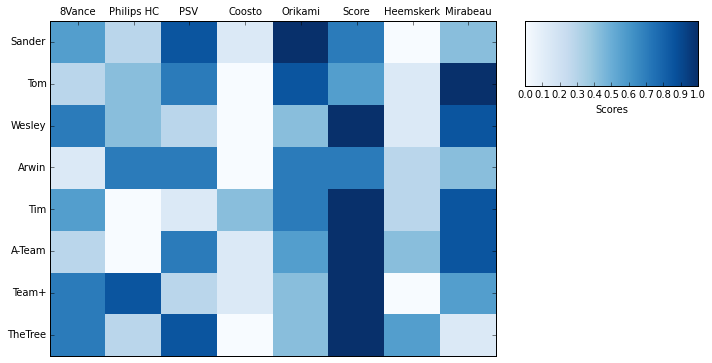

In [31]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))

ax.pcolor(df, cmap=plt.cm.Blues)

ax.xaxis.tick_top()

ax.set_yticks(np.arange(0.5, len(groups)))
ax.set_yticklabels(groups, minor=False)
ax.set_xticks(np.arange(0.5, len(companies)))
ax.set_xticklabels(companies, minor=False)

ax1 = fig.add_axes([0.95,0.75,0.3,0.15])
cb1 = matplotlib.colorbar.ColorbarBase(ax1, orientation='horizontal', cmap=plt.cm.Blues)
cb1.set_label('Scores')

cb1.ax.set_yticklabels(best_scores)

plt.show()